In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
train_data=pd.read_excel('/content/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_into_datetime(col):
  train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-09 05:50:00,2021-11-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-09 18:05:00,2021-11-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-09 16:50:00,2021-11-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-09 05:50:00,2021-11-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-11-09 18:05:00,2021-11-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-11-09 16:50:00,2021-11-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
def extract_hour(df,col):
  df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
  df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
  df.drop(col,axis=1,inplace=True)

In [19]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [20]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
'2h 50m'.split(' ') 

['2h', '50m']

In [23]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'      
        else:
            duration[i]='0h '+ duration[i]   

In [24]:
train_data['Duration']=duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [28]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)


In [29]:
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
drop_column(train_data,'Duration')

In [32]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [33]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [34]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [35]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [37]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
import seaborn as sns

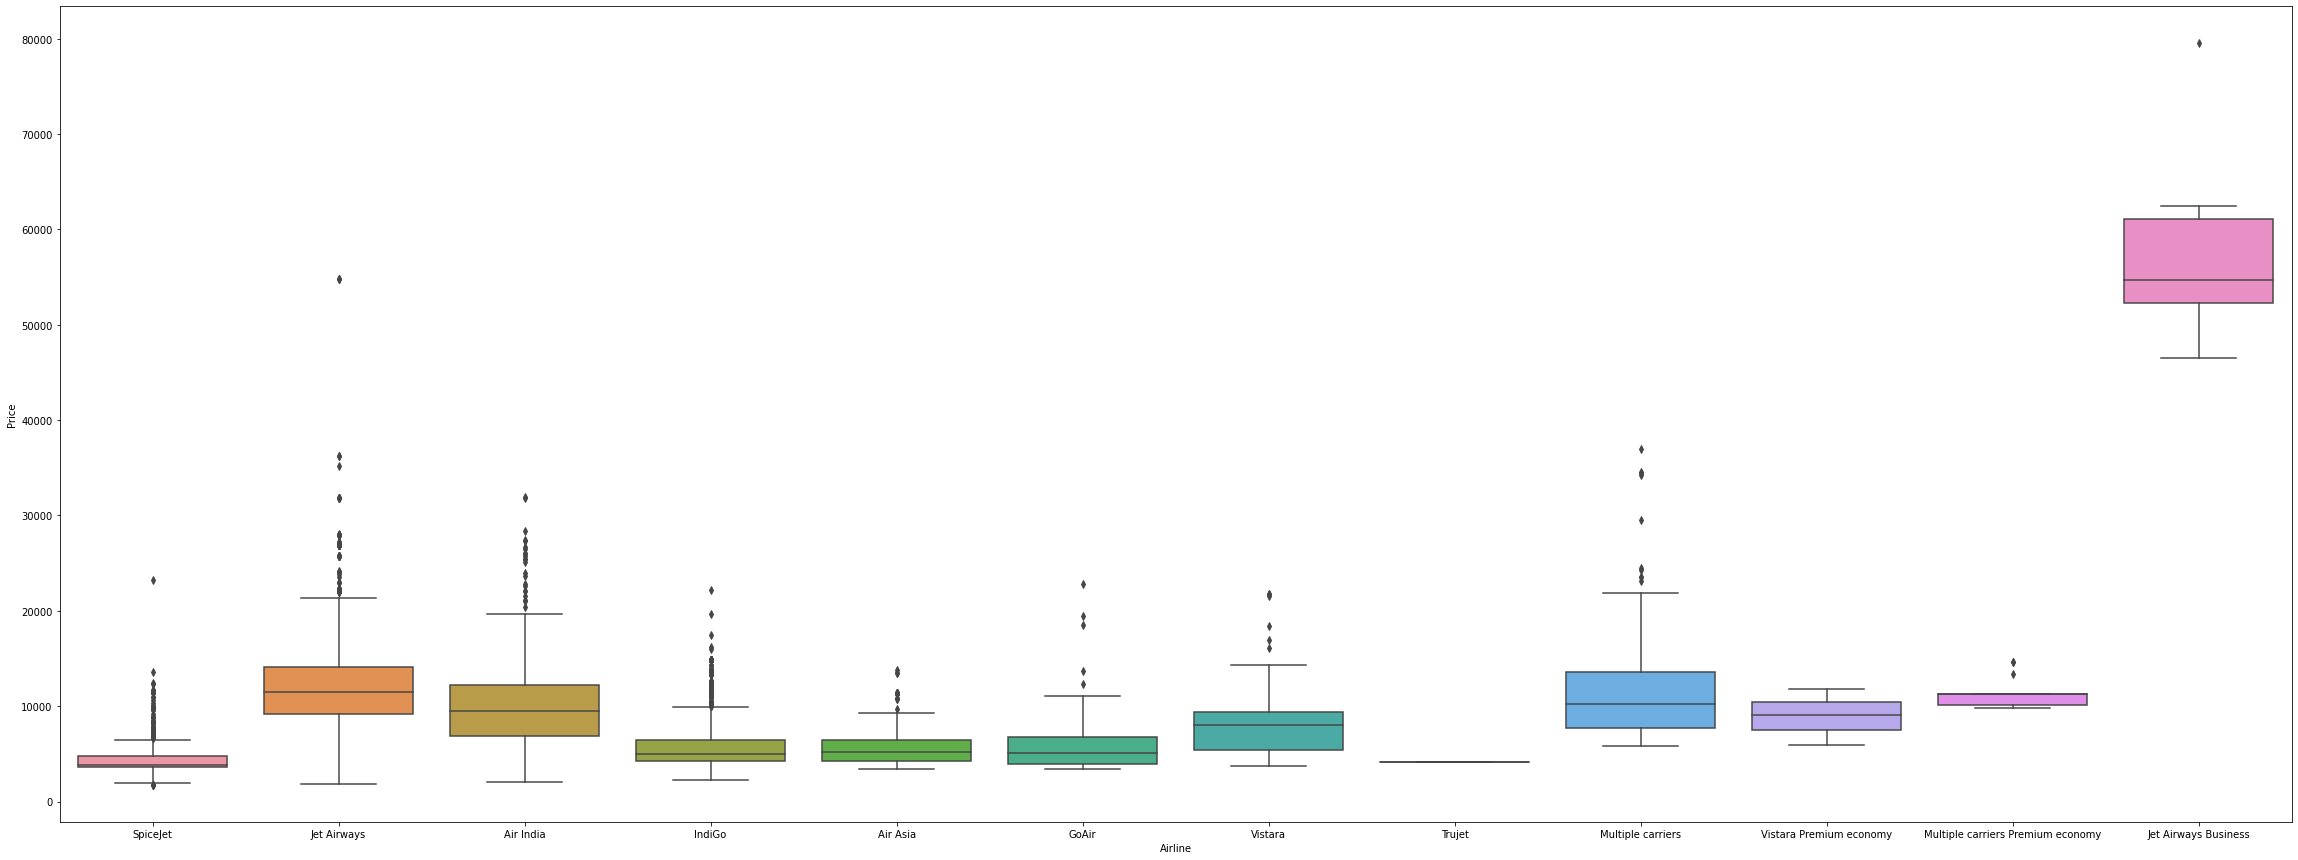

In [39]:
plt.figure(figsize=(40,15))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=True))

In [40]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [41]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


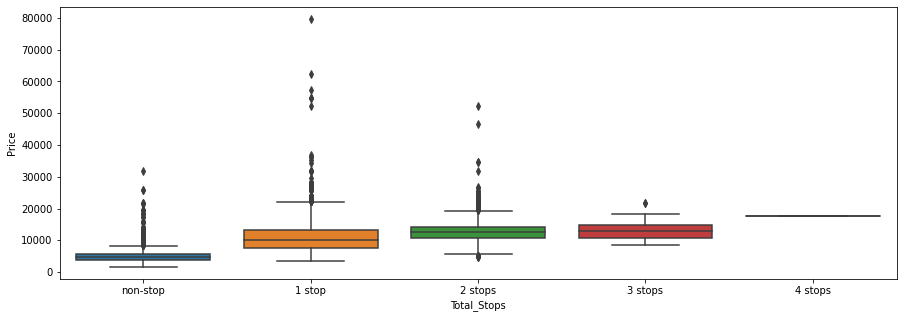

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=True))

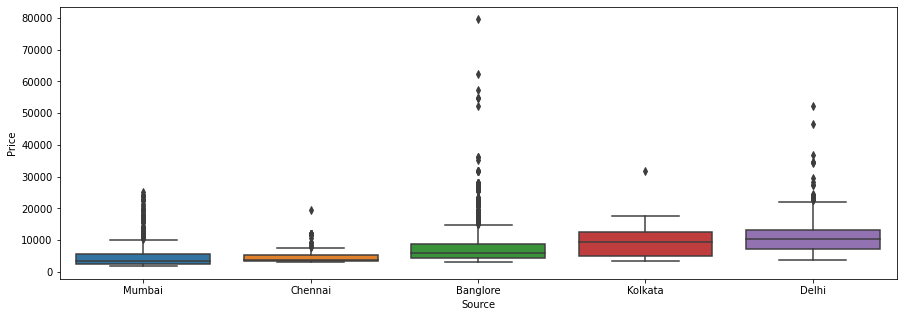

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=True))

In [44]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [45]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


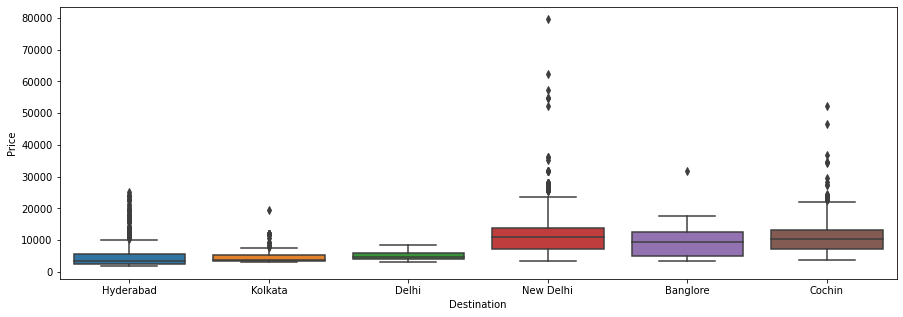

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=True))

In [47]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [48]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [50]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [51]:
drop_column(categorical,'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [53]:
for i in ['Route_3','Route_4','Route_5']:
  categorical[i].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [56]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
encoder=LabelEncoder()

In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical[i]=encoder.fit_transform(categorical[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
drop_column(categorical,'Additional_Info')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [65]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [67]:
data_train=pd.concat([categorical,Airline,Destination,Source,train_data[cont_col]],axis=1)

In [68]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [69]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13302,3,1,16,50,21,35,4,45


In [70]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Route_1                            10682 non-null  int64
 2   Route_2                            10682 non-null  int64
 3   Route_3                            10682 non-null  int64
 4   Route_4                            10682 non-null  int64
 5   Route_5                            10682 non-null  int64
 6   Air India                          10682 non-null  uint8
 7   GoAir                              10682 non-null  uint8
 8   IndiGo                             10682 non-null  uint8
 9   Jet Airways                        10682 non-null  uint8
 10  Jet Airways Business               10682 non-null  uint8
 11  Multiple carriers                  10682 non-null  uint8
 12  Multiple carriers 

In [71]:
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


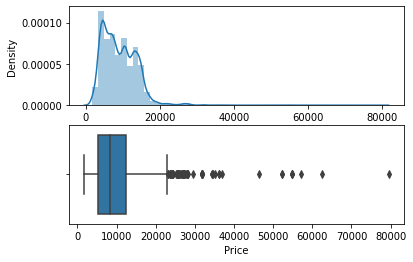

In [72]:
plot(data_train,'Price')

In [73]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


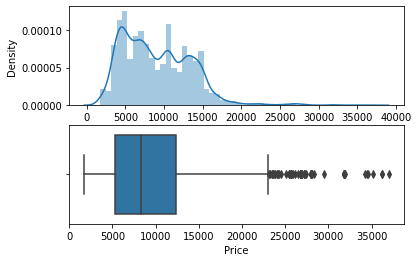

In [74]:
plot(data_train,'Price')

In [75]:
data_train.tail()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4107.0,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4145.0,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7229.0,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12648.0,3,1,11,30,14,10,2,40
10682,2,3,16,4,5,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,11753.0,5,9,10,55,19,15,8,20


In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  int64  
 1   Route_1                            10682 non-null  int64  
 2   Route_2                            10682 non-null  int64  
 3   Route_3                            10682 non-null  int64  
 4   Route_4                            10682 non-null  int64  
 5   Route_5                            10682 non-null  int64  
 6   Air India                          10682 non-null  uint8  
 7   GoAir                              10682 non-null  uint8  
 8   IndiGo                             10682 non-null  uint8  
 9   Jet Airways                        10682 non-null  uint8  
 10  Jet Airways Business               10682 non-null  uint8  
 11  Multiple carriers                  10682 non-null  uin

In [77]:
X=data_train.drop('Price',axis=1)

In [78]:
X.shape

(10682, 34)

In [79]:
y=data_train['Price']

In [80]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [81]:
from sklearn.feature_selection import mutual_info_classif

In [82]:
mutual_info_classif(X,y)

array([2.1472751 , 2.04025704, 2.81708748, 2.30273364, 1.47252641,
       0.80318129, 0.76949968, 0.09610573, 0.65813067, 0.92012423,
       0.00604242, 0.57400336, 0.00827062, 0.31520505, 0.00813829,
       0.22714394, 0.00372775, 1.53782636, 0.4146086 , 0.28089357,
       0.16748022, 0.37129609, 0.15519942, 1.54542451, 0.8791832 ,
       0.29583999, 1.0707622 , 0.84693364, 1.43799684, 1.20720817,
       1.86734711, 1.5496892 , 1.79406719, 1.05714981])

In [83]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.094322
Route_1,2.026979
Route_2,2.816004
Route_3,2.272721
Route_4,1.488663
Route_5,0.697291
Air India,0.775958
GoAir,0.096698
IndiGo,0.673079
Jet Airways,0.913067


In [84]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)


,importance
Route_2,2.816004
Route_3,2.272721
Total_Stops,2.094322
Route_1,2.026979
Arrival_Time_hour,1.802051
Duration_hours,1.799283
Delhi,1.525920
Cochin,1.510573
Arrival_Time_minute,1.505626
Route_4,1.488663


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8545, 34), (2137, 34), (8545,), (2137,))

In [86]:
from sklearn import metrics
def predict(ml_model,):
  model=ml_model.fit(X_train,y_train)
  print('Training Score {}'.format(model.score(X_train,y_train)))
  Predictions=model.predict(X_test)
  print('Predictions are {}'.format(Predictions))
  print('\n')
  r2_score=metrics.r2_score(y_test,Predictions)
  print('r2_score {}'.format(r2_score))
  print('MAE :',metrics.mean_absolute_error(y_test,Predictions))
  print('MSE :',metrics.mean_squared_error(y_test,Predictions))
  print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,Predictions)))
  sns.distplot(y_test-Predictions)

Training Score 0.9557225572430165
Predictions are [10395.79885714  3020.23       10554.655      ... 10678.03
 12304.565      12818.95      ]


r2_score 0.8030803741679684
MAE : 1155.8742627137199
MSE : 3579937.499751918
RMSE : 1892.0722765666003


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


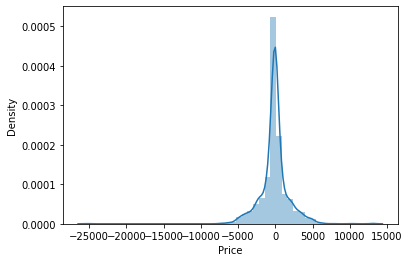

In [87]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Training Score 0.6179681125902019
Predictions are [11584.78716074  3858.02905787 11885.43701272 ... 11091.30515538
 12160.17149261 12532.33462932]


r2_score 0.6045102485317859
MAE : 1949.398729578543
MSE : 7189880.572169574
RMSE : 2681.3952659333113


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


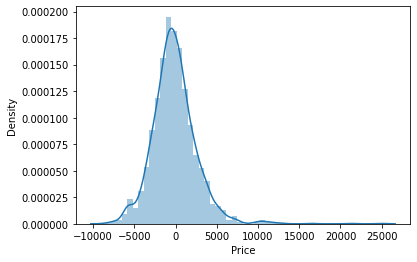

In [89]:
predict(LinearRegression())

Training Score 0.7832983473739715
Predictions are [ 9568.   3079.2 11821.4 ... 11025.4 11106.4 13593. ]


r2_score 0.6445494754873482
MAE : 1710.3137108095461
MSE : 6461979.889677118
RMSE : 2542.0424641766153


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


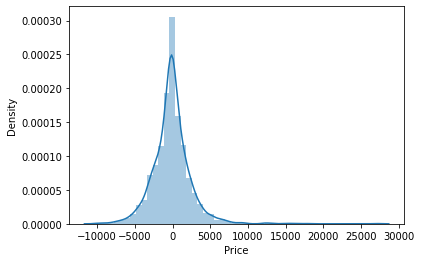

In [90]:
predict(KNeighborsRegressor())

Training Score 0.968880005971406
Predictions are [10569.5  3100.   8586.  ... 11142.  12373.  13014. ]


r2_score 0.6764437772856784
MAE : 1353.9408984557792
MSE : 5882151.411160506
RMSE : 2425.3147035303496


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


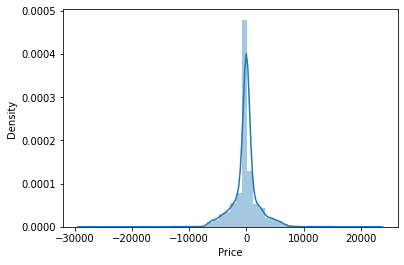

In [91]:
predict(DecisionTreeRegressor())

Training Score 0.04760233931286484
Predictions are [8473.59973271 7937.27275677 8626.32274777 ... 8611.32916374 8609.60938098
 8528.68825182]


r2_score 0.05991753927283483
MAE : 3294.5873039407743
MSE : 17090406.50365082
RMSE : 4134.054487261969


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


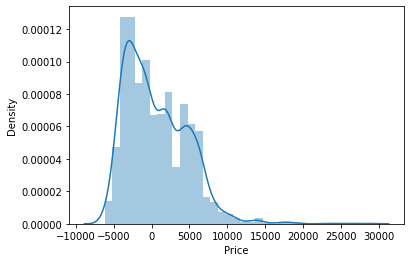

In [92]:
predict(SVR())

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [95]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [96]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [97]:
reg_rf=RandomForestRegressor()

In [98]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [99]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [100]:
rf_random.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 1200}

In [101]:
prediction=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


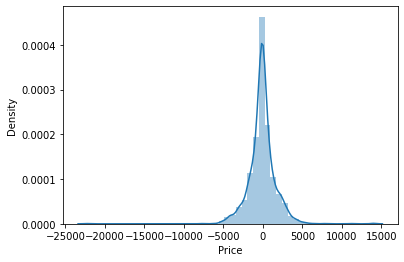

In [102]:
sns.distplot(y_test-prediction)

In [103]:
metrics.r2_score(y_test,prediction)

0.8413259990598552

In [104]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1107.5582726278212
MSE 2884643.944457951
RMSE 1698.4239589860804


In [105]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [106]:
data_train["Air_India"]=data_train['Air India']
data_train["Jet_Airways"]=data_train['Jet Airways']
data_train["Jet_Airways_Business"]=data_train['Jet Airways Business']
data_train["Multiple_carriers"]=data_train['Multiple carriers']
data_train["Multiple_carriers_Premium_economy"]=data_train['Multiple carriers Premium economy']
data_train["Vistara_Premium_economy"]=data_train['Vistara Premium economy']
data_train["New_Delhi"]=data_train['New Delhi']
data_train["New_Delhi"]=data_train['New Delhi']

In [107]:
import statsmodels.formula.api as smf
model = smf.ols(formula="Price ~ Total_Stops+Route_1+Route_2+Route_3+Route_4+Route_5+Air_India+GoAir+IndiGo+Jet_Airways+Jet_Airways_Business+Multiple_carriers+Multiple_carriers_Premium_economy+SpiceJet+Trujet+Vistara+Vistara_Premium_economy+Cochin+Delhi+Hyderabad+Kolkata+New_Delhi+Chennai+Delhi+Kolkata+Mumbai+journey_day+journey_month+Dep_Time_hour+Dep_Time_minute+Arrival_Time_hour+Arrival_Time_minute+Duration_hours+Duration_mins",  data=data_train)
result = model.fit()
result.summary() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     589.0
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        06:31:34   Log-Likelihood:                -99631.
No. Observations:               10682   AIC:                         1.993e+05
Df Residuals:                   10652   BIC:                         1.995e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3490.8820    934.978      3.734      0.000    1658.150    5323.614
Total_Stops                        3020.1205    254.305     11.876      0.000    2521.636    3518.605
Route_1                             236.9462    121.840      1.945      0.052      -1.883     475.775
Route_2                             -55.8070      3.782    -14.757      0.000     -63.220     -48.394
Route_3                             -26.8025     10.530     -2.545      0.011     -47.442      -6.162
Route_4                              44.0808     32.940      1.338      0.181     -20.488     108.649
Route_5                             339.3889    137.997      2.459      0.014      68.890     609.888
Air_India                          1861.3138    178.066     10.453      0.000    1512.271    2210.356
GoAir                              -185.2329    250.592     -0.739      0.460    -676.440     305.974
IndiGo                              472.6257    168.751      2.801      0.005     141.842     803.409
Jet_Airways                        4147.8785    167.664     24.739      0.000    3819.226    4476.531
Jet_Airways_Business              -2611.9752   1126.645     -2.318      0.020   -4820.410    -403.540
Multiple_carriers                  3391.8367    185.693     18.266      0.000    3027.843    3755.830
Multiple_carriers_Premium_economy  4232.5628    774.381      5.466      0.000    2714.632    5750.494
SpiceJet                            108.1566    185.034      0.585      0.559    -254.545     470.858
Trujet                            -1616.6792   2733.321     -0.591      0.554   -6974.498    3741.140
Vistara                            2296.6420    204.385     11.237      0.000    1896.009    2697.275
Vistara_Premium_economy            3572.7742   1582.197      2.258      0.024     471.372    6674.177
Cochin                               41.6076     37.536      1.108      0.268     -31.971     115.186
Delhi[0]                            438.3967    369.574      1.186      0.236    -286.037    1162.831
Delhi[1]                             41.6076     37.536      1.108      0.268     -31.971     115.186
Hyderabad                          -142.8692    139.648     -1.023      0.306    -416.605     130.867
Kolkata[0]                            4.0265     77.090      0.052      0.958    -147.085     155.138
Kolkata[1]                          119.4432    123.688      0.966      0.334    -123.009     361.895
New_Delhi                          3030.2771    396.479      7.643      0.000    2253.104    3807.450
Chennai                               4.0265     77.090      0.052      0.958    -147.085     155.138
Mumbai                             -142.8692    139.648     -1.023      0.306    -416.605     130.867
journey_day            